<a href="https://colab.research.google.com/github/andiub97/CovidPubRank/blob/master/CovidPageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page Ranking Algorithms on Google Cloud Dataproc

- Use the [Cloud Resource Manager](https://cloud.google.com/resource-manager) to create a project if you do not already have one.
- Enable Dataproc and Cloud Storage services for the project 
- [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
- See [Google Cloud Storage (GCS) Documentation](https://cloud.google.com/storage/) for more info.


## Set Environment variables(optional) 
Here you can choose if install colab-env dependency and allow Google Drive to access to your Drive and create environment file containing enviroment variables that you can choose for all later tasks involving bucket, cluster properties and so on.

In [ ]:
!pip install colab-env --upgrade

In [ ]:
import colab_env

colab_env.envvar_handler.add_env("GOOGLE_PROJECT_ID", "scalaproject-343716", overwrite=True)
colab_env.envvar_handler.add_env("DATASET_BUCKET", "gs://articles_datasets/", overwrite=True)
colab_env.envvar_handler.add_env("OUTPUT_BUCKET", "gs://output_bucket_results/", overwrite=True)
colab_env.envvar_handler.add_env("CLUSTER_REGION", "us-central1", overwrite=True)
colab_env.envvar_handler.add_env("CLUSTER_ZONE", "us-central1-a", overwrite=True)

!more gdrive/My\ Drive/vars.env

## Allow Google Cloud access to the notebook and set GC project for this session

In [3]:
import os
from google.colab import auth
auth.authenticate_user()

project_id = os.getenv("GOOGLE_PROJECT_ID")
!gcloud config set project {project_id}

Updated property [core/project].


## Clone CovidPubRank repo from Github, unzip citation archive and move files to "citations" folder 

In [ ]:
import tarfile
!git clone https://github.com/andiub97/CovidPubRank.git

tar = tarfile.open("./CovidPubRank/data/data.tar.gz")
tar.extractall()
tar.close()

!mkdir ./sample_data/datasets
!mv ./dataset_1015681.txt ./sample_data/datasets
!mv ./dataset_32685.txt ./sample_data/datasets
!mv ./dataset_14924.txt ./sample_data/datasets
!mv ./dataset_9647.txt ./sample_data/datasets

## Create buckets and load datasets and jar file into them
Create a bucket and upload datasets into it.
Remember create a bucket for jar file and upload it using GCP Graphic Interface or shell, but we suggest using Google Cloud CLI by your machine

In [ ]:
bucket_name = os.getenv("DATASET_BUCKET")

!gsutil mb -l us-central1 -b on gs://{bucket_name}

# Copy files to new bucket.
!gsutil cp ./sample_data/datasets/dataset_9647.txt {bucket_name}/
!gsutil cp ./sample_data/datasets/dataset_14924.txt {bucket_name}/
!gsutil cp ./sample_data/datasets/dataset_32685.txt {bucket_name}/
!gsutil cp ./sample_data/datasets/dataset_1015681.txt {bucket_name}/

## Create output bucket for storing algorithms statistics

In [ ]:
output_bucket_name = os.getenv("OUTPUT_BUCKET")
!gsutil mb -l us-central1 -b on gs://{output_bucket_name}

# Weak Scalability 
### Weak scaling concerns the speedup for a scaled problem size with respect to the number of processors

## Create clusters for scaling in number of worker

In [ ]:
region = os.getenv("CLUSTER_REGION")
zone = os.getenv("CLUSTER_ZONE")

!gcloud dataproc clusters create single-node-cluster \
  --region {region} \
  --zone {zone} \
  --single-node 

In [ ]:
!gcloud dataproc clusters create two-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4\
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 2 \
  --worker-boot-disk-size 500

In [ ]:
!gcloud dataproc clusters create three-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 3 \
  --worker-boot-disk-size 500 

In [ ]:
!gcloud dataproc clusters create four-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 4 \
  --worker-boot-disk-size 500 

In [ ]:
!gcloud dataproc clusters create five-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 5 \
  --worker-boot-disk-size 500 \

## Perform distributed algorithms varying in dataset and cluster size

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=single-node-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"single-node-weak/dataset_1015681" "4" "distributedOnCloud" "one-worker-weak"

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=two-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"two-weak/dataset_1015681" "16" "distributedOnCloud" "two-workers-weak"

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=three-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"three-weak/dataset_1015681" "32" "distributedOnCloud" "three-workers-weak"

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=four-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"four-weak/dataset_1015681" "32" "distributedOnCloud" "four-workers-weak"

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=five-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"five-weak/dataset_1015681" "32" "distributedOnCloud" "five-workers-weak"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete single-node-cluster \
    --region={os.getenv("CLUSTER_REGION")}

# Strong scalability
### Perform all algorithms on same dataset varying number of workers per cluster

## Create 2-workers cluster with n1-standard-4 machines

In [ ]:
!gcloud dataproc clusters create two-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4\
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 2 \
  --worker-boot-disk-size 500

## Send Dataproc jobs performing DistributedPageRank and ParallelPageRankLibrary algorithms on a 1.8 GB dataset size

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=two-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"two-nodes-4/distributed" "16" "distributedOnCloud" "two_workers_n1_standard_4"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete two-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} 

## Create 2-workers cluster with n1-standard-8 machines

In [ ]:
!gcloud dataproc clusters create two-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-8\
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-8 \
  --num-workers 2 \
  --worker-boot-disk-size 500

## Send Dataproc jobs performing DistributedPageRank and ParallelPageRankLibrary algorithms on "dataset_1015681.txt" dataset

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=two-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"two-nodes-8/distributed" "16" "distributedOnCloud" "two_workers_n1_standard_8"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete two-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} -Y

#Create 3-workers cluster

In [ ]:
!gcloud dataproc clusters create three-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 3 \
  --worker-boot-disk-size 500 

## Send Dataproc jobs performing DistributedPageRank and ParallelPageRankLibrary algorithms on a 1.8 GB dataset size

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=three-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"three-nodes/distributed" "32" "distributedOnCloud" "three_workers_n1_standard_4"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete three-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} 

## Create 4-workers cluster

In [ ]:
!gcloud dataproc clusters create four-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 4 \
  --worker-boot-disk-size 500 

## Send Dataproc jobs performing DistributedPageRank and ParallelPageRankLibrary algorithms on a 1.8 GB dataset size

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=four-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"four-nodes/distributed" "32" "distributedOnCloud" "four_workers_n1_standard_4"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete four-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")}

## Create 5-workers cluster

In [ ]:
!gcloud dataproc clusters create five-workers-cluster \
  --region {os.getenv("CLUSTER_REGION")} \
  --zone {os.getenv("CLUSTER_ZONE")} \
  --master-machine-type n1-standard-4 \
  --master-boot-disk-size 500 \
  --worker-machine-type n1-standard-4 \
  --num-workers 5 \
  --worker-boot-disk-size 500 \

## Send Dataproc jobs performing DistributedPageRank and ParallelPageRankLibrary algorithms on a 1.8 GB dataset size

In [ ]:
!gcloud dataproc jobs submit spark \
    --cluster=five-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")} \
    --jar=gs://covid_program/covidpubrank_2.12-0.1.0-SNAPSHOT.jar \
    -- "yarn" "DistributedAlgorithms" {os.getenv("DATASET_BUCKET")}"dataset_1015681.txt" {os.getenv("OUTPUT_BUCKET")}"five-nodes/distributed" "32" "distributedOnCloud" "five_workers_n1_standard_4"

## Delete cluster

In [ ]:
!gcloud dataproc clusters delete five-workers-cluster \
    --region={os.getenv("CLUSTER_REGION")}

## Get jobs list and delete job specifying its id

In [ ]:
!gcloud config set dataproc/region {os.getenv("CLUSTER_REGION")}
listJob = !gcloud dataproc jobs list --format='value(JOB_ID)'

for i in listJob:
  !gcloud dataproc jobs delete {i}

## Get job execution output, in other words get ranking algorithms' execution time and save them on "strong-scalability-result" and "weak-scalability-result" files

In [4]:
!gsutil -m cp -r "gs://output_bucket_results" .

Copying gs://output_bucket_results/five-nodes/distributed/_SUCCESS...
Copying gs://output_bucket_results/five-weak/dataset_1015681/_SUCCESS...
Copying gs://output_bucket_results/five-nodes/distributed/part-00000...
Copying gs://output_bucket_results/five-weak/dataset_1015681/part-00000...
Copying gs://output_bucket_results/four-nodes/distributed/_SUCCESS...
Copying gs://output_bucket_results/four-weak/dataset_1015681/_SUCCESS...
Copying gs://output_bucket_results/four-nodes/distributed/part-00000...
Copying gs://output_bucket_results/single-node-weak/dataset_1015681/_SUCCESS...
Copying gs://output_bucket_results/four-weak/dataset_1015681/part-00000...
Copying gs://output_bucket_results/single-node-weak/dataset_1015681/part-00000...
Copying gs://output_bucket_results/single-node/dataset_9647/_SUCCESS...
Copying gs://output_bucket_results/single-node/dataset_9647/part-00000...
Copying gs://output_bucket_results/three-nodes/distributed/_SUCCESS...
Copying gs://output_bucket_results/three-

In [ ]:
with open("./output_bucket_results/single-node-weak/dataset_1015681/part-00000") as textfile1, open("./output_bucket_results/two-weak/dataset_1015681/part-00000") as textfile2, open("./output_bucket_results/three-weak/dataset_1015681/part-00000") as textfile3, open("./output_bucket_results/four-weak/dataset_1015681/part-00000") as textfile4, open("./output_bucket_results/five-weak/dataset_1015681/part-00000") as textfile5:
    data1 = textfile1.read()
    data2 = textfile2.read()
    data3 = textfile3.read()
    data4 = textfile4.read()
    data5 = textfile5.read()


data1 += data2
data1 += data3 
data1 += data4
data1 += data5
print (data1)
with open("./output_bucket_results/weak-scalability-result.txt", 'w') as textfile6:

    textfile6.write(data1)

In [5]:
with open("./output_bucket_results/five-nodes/distributed/part-00000") as textfile1, open("./output_bucket_results/four-nodes/distributed/part-00000") as textfile2, open("./output_bucket_results/two-nodes-4/distributed/part-00000") as textfile3, open("./output_bucket_results/two-nodes-8/distributed/part-00000") as textfile4,open("./output_bucket_results/three-nodes/distributed/part-00000") as textfile5 : 
    data1 = textfile1.read()
    data2 = textfile2.read()
    data3 = textfile3.read()
    data4 = textfile4.read()
    data5 = textfile5.read()


data1 += data2
data1 += data3
data1 += data4
data1 += data5

with open("./output_bucket_results/strong-scalability-result.txt", 'w') as textfile6:

    textfile6.write(data1)

## Plot execution time of algorithms showing weak scalability

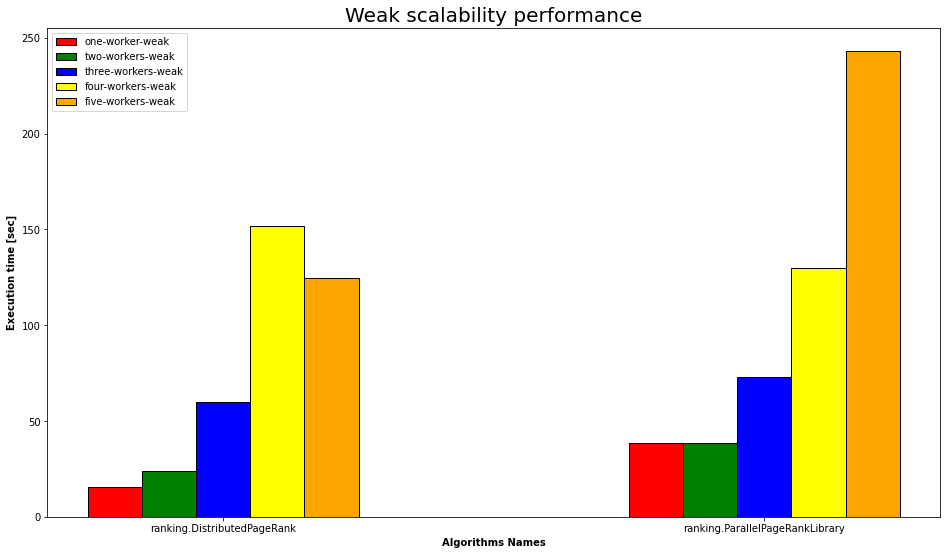

In [49]:
import numpy as np
import matplotlib.pyplot as plt                                                

names = []
times = []
dataset_name = []
chars = "()\n"

results1 = {
   'one-worker-weak': {
       'ranking.DistributedPageRank': '0.0',
       'ranking.ParallelPageRankLibrary': '0.0'
   },
   'two-workers-weak': {
       'ranking.DistributedPageRank': '0.0',
       'ranking.ParallelPageRankLibrary': '0.0'
   },
   'three-workers-weak': {
       'ranking.DistributedPageRank': '0.0',
       'ranking.ParallelPageRankLibrary': '0.0'
   },
   'four-workers-weak': {
       'ranking.DistributedPageRank': '0.0',
       'ranking.ParallelPageRankLibrary': '0.0'
   },
   'five-workers-weak': {
       'ranking.DistributedPageRank': '0.0',
       'ranking.ParallelPageRankLibrary': '0.0'
   }
}

f = open("./output_bucket_results/weak-scalability-result.txt",'r')
     
    

for row in f:
  for c in chars:
    row = row.replace(c,"")
  for c in ",":
    row = row.replace(c," ")
    row = row.split(' ')
  if ("one-worker-weak" == row[3]):
    results1["one-worker-weak"][row[0]] = (row[1])
  if ("two-workers-weak" == row[3]):
    results1["two-workers-weak"][row[0]] = (row[1])
  if ("three-workers-weak" == row[3]):
    results1["three-workers-weak"][row[0]] = (row[1])    
  if ("four-workers-weak" == row[3]):
    results1["four-workers-weak"][row[0]] = (row[1])
  if ("five-workers-weak" == row[3]):
    results1["five-workers-weak"][row[0]] = (row[1])

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(16, 9))
fig[0].patch.set_facecolor('xkcd:white')

# set height of bar
one = []
for i in results1["one-worker-weak"]:
    one.append(float(results1["one-worker-weak"][i]))

two = []
for i in results1["two-workers-weak"]:
    two.append(float(results1["two-workers-weak"][i]))

three = []
for i in results1["three-workers-weak"]:
    three.append(float(results1["three-workers-weak"][i]))

four = []
for i in results1["four-workers-weak"]:
    four.append(float(results1["four-workers-weak"][i]))

five = []
for i in results1["five-workers-weak"]:
    five.append(float(results1["five-workers-weak"][i]))

# Set position of bar on X axis
br1 = np.arange(len(one))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, one, color ='r', width = barWidth,
		edgecolor ='black', label ='one-worker-weak')

plt.bar(br2, two, color ='g', width = barWidth,
		edgecolor ='black', label ='two-workers-weak')

plt.bar(br3, three, color ='b', width = barWidth,
		edgecolor ='black', label ='three-workers-weak')

plt.bar(br4, four, color ='yellow', width = barWidth,
		edgecolor ='black', label ='four-workers-weak')

plt.bar(br5, five, color ='orange', width = barWidth,
		edgecolor ='black', label ='five-workers-weak')

# Adding Xticks
plt.xlabel('Algorithms Names', fontweight ='bold', fontsize = 10)
plt.ylabel('Execution time [sec]', fontweight ='bold', fontsize = 10)
# Setting a logarithmic scale for y-axis
x = results1["one-worker-weak"]

ticks = []
for k in x.keys():
  if k:
      ticks.append(k)
plt.xticks([r + 0.1+ barWidth for r in range(len(br1))],ticks)

plt.legend()
plt.title("Weak scalability performance", fontdict = {'fontsize' : 20})

plt.show()


## Plot execution time of algorithms showing strong scalability

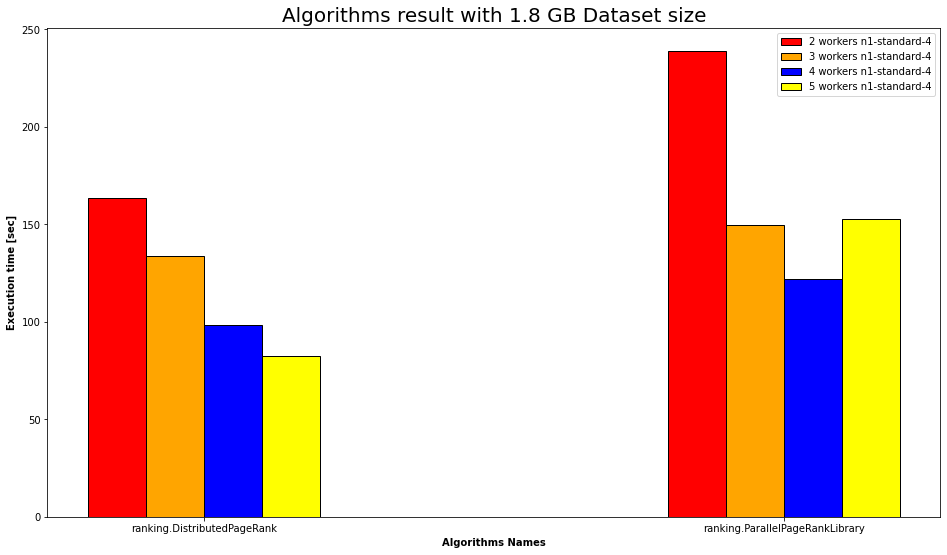

In [6]:
import numpy as np
import matplotlib.pyplot as plt                                                

names = []
times = []
dataset_name = []
chars = "()\n"

stats = {
   "two_workers_n1_standard_4":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   },
   "three_workers_n1_standard_4":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   },
   "four_workers_n1_standard_4":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   },
    "five_workers_n1_standard_4":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   }
}

f = open('./output_bucket_results/strong-scalability-result.txt','r')
     
    
for row in f:
  for c in chars:
    row = row.replace(c,"")
  for c in ",":
    row = row.replace(c," ")
    row = row.split(' ')
  if ("two_workers_n1_standard_4" == row[3]):
    stats["two_workers_n1_standard_4"][row[0]] = (row[1])
  if ("three_workers_n1_standard_4" == row[3]):
    stats["three_workers_n1_standard_4"][row[0]] = (row[1])
  if ("four_workers_n1_standard_4" == row[3]):
    stats["four_workers_n1_standard_4"][row[0]] = (row[1])
  if ("five_workers_n1_standard_4" == row[3]):
    stats["five_workers_n1_standard_4"][row[0]] = (row[1])

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize = (16, 9))
fig[0].patch.set_facecolor('xkcd:white')

# set height of bar
two_workers_n1_standard_4 = []
for i in stats["two_workers_n1_standard_4"]:   
  two_workers_n1_standard_4.append(float(stats["two_workers_n1_standard_4"][i]))

three_workers_n1_standard_4 = []
for i in stats["three_workers_n1_standard_4"]:   
  three_workers_n1_standard_4.append(float(stats["three_workers_n1_standard_4"][i]))

four_workers_n1_standard_4 = []
for i in stats["four_workers_n1_standard_4"]:   
  four_workers_n1_standard_4.append(float(stats["four_workers_n1_standard_4"][i]))

five_workers_n1_standard_4 = []
for i in stats["five_workers_n1_standard_4"]:   
  five_workers_n1_standard_4.append(float(stats["five_workers_n1_standard_4"][i]))

# Set position of bar on X axis
br1 = np.arange(len(two_workers_n1_standard_4))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, two_workers_n1_standard_4, color ='r', width = barWidth,
		edgecolor ='black', label ='2 workers n1-standard-4')

plt.bar(br2, three_workers_n1_standard_4, color ='orange', width = barWidth,
		edgecolor ='black', label ='3 workers n1-standard-4')

plt.bar(br3, four_workers_n1_standard_4, color ='b', width = barWidth,
		edgecolor ='black', label ='4 workers n1-standard-4')

plt.bar(br4, five_workers_n1_standard_4, color ='yellow', width = barWidth,
		edgecolor ='black', label ='5 workers n1-standard-4')


# Adding Xticks
plt.xlabel('Algorithms Names', fontweight ='bold', fontsize = 10)
plt.ylabel('Execution time [sec]', fontweight ='bold', fontsize = 10)
# Setting a logarithmic scale for y-axis
x = stats["two_workers_n1_standard_4"]

ticks = []
for k in x.keys():
  if k:
      ticks.append(k)

plt.xticks([r + barWidth + 0.05 for r in range(len(br1))], ticks)
plt.title("Algorithms result with 1.8 GB Dataset size", fontdict = {'fontsize' : 20})
plt.legend()
plt.show()

2


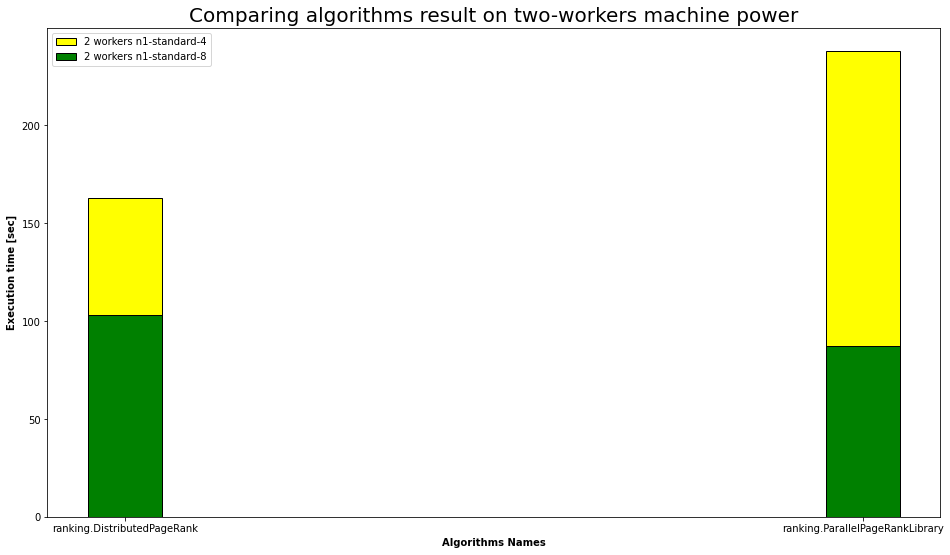

In [84]:
import numpy as np
import matplotlib.pyplot as plt                                                

names = []
times = []
dataset_name = []
chars = "()\n"

stats = {
   "two_workers_n1_standard_4":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   },
   "two_workers_n1_standard_8":{
      "ranking.DistributedPageRank":"0.0",
      "ranking.ParallelPageRankLibrary":"0.0"
   }
}

f = open('./output_bucket_results/strong-scalability-result.txt','r')
     
    
for row in f:
  for c in chars:
    row = row.replace(c,"")
  for c in ",":
    row = row.replace(c," ")
    row = row.split(' ')
  if ("two_workers_n1_standard_4" == row[3]):
    stats["two_workers_n1_standard_4"][row[0]] = (row[1])
  if ("two_workers_n1_standard_8" == row[3]):
    stats["two_workers_n1_standard_8"][row[0]] = (row[1])

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize = (16, 9))
fig[0].patch.set_facecolor('xkcd:white')


# set height of bar
two_workers_n1_standard_4 = []
for i in stats["two_workers_n1_standard_4"]:   
  two_workers_n1_standard_4.append(float(stats["two_workers_n1_standard_4"][i]))

two_workers_n1_standard_8 = []
for i in stats["two_workers_n1_standard_8"]:   
  two_workers_n1_standard_8.append(float(stats["two_workers_n1_standard_8"][i]))

# Set position of bar on X axis
print(len(two_workers_n1_standard_4))
br1 = np.arange(len(two_workers_n1_standard_4))
br2 = br1


# Make the plot
plt.bar(br1, two_workers_n1_standard_4, color ='yellow', width = barWidth,
		edgecolor ='black', label ='2 workers n1-standard-4')

plt.bar(br2, two_workers_n1_standard_8, color ='g', width = barWidth,
		edgecolor ='black', label ='2 workers n1-standard-8')

# Adding Xticks
plt.xlabel('Algorithms Names', fontweight ='bold', fontsize = 10)
plt.ylabel('Execution time [sec]', fontweight ='bold', fontsize = 10)
# Setting a logarithmic scale for y-axis
x = stats["two_workers_n1_standard_4"]

ticks = []
for k in x.keys():
  if k:
      ticks.append(k)

plt.xticks([r for r in range(len(br1))], ticks)
plt.title("Comparing algorithms result on two-workers machine power", fontdict = {'fontsize' : 20})
plt.legend()
plt.show()